## Fashion MNIST Image Classification Using Convolutional Neural Networks (CNN)

### Introduction
In this project, we implement an image classification system using Convolutional Neural Networks (CNNs) to classify images from the Fashion MNIST dataset. Fashion MNIST is a dataset of Zalando's article images consisting of 10 different categories, such as T-shirts, trousers, and dresses. Image classification is a fundamental task in computer vision, and CNNs are highly effective for this purpose due to their ability to capture complex patterns in images through convolutional layers. This project involves:

- **Data Preprocessing**: Preparing and normalizing the dataset to improve model performance and generalization.
- **Model Design and Training**: Constructing a CNN model to classify fashion images into predefined categories.
- **Model Evaluation**: Assessing the performance of the model on a test dataset to ensure its accuracy and robustness.
- **Testing and Visualization**: Testing the model with new images and visualizing the classification results.

### Objective
The objective of this project is to develop a robust image classification system capable of accurately identifying different categories of clothing items in the Fashion MNIST dataset. This includes:

- Designing a CNN model to classify images from the Fashion MNIST dataset.
- Preprocessing and normalizing image data to enhance model training.
- Training the CNN model to achieve high accuracy on both training and validation datasets.
- Evaluating the model's performance on unseen test data.
- Testing the model with new images and interpreting the classification results.

### Implementation
Below is the Python code implementing the steps mentioned above:

### Step 1: Import Necessary Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load the Fashion MNIST Dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Step 3: Preprocess the Data

In [4]:
# Reshape the data to include a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Step 4: Define the CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


### Step 5: Compile the Model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Step 6: Train the Model

In [8]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.6843 - loss: 0.8857 - val_accuracy: 0.8527 - val_loss: 0.4005
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8406 - loss: 0.4408 - val_accuracy: 0.8762 - val_loss: 0.3356
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8671 - loss: 0.3723 - val_accuracy: 0.8785 - val_loss: 0.3197
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8787 - loss: 0.3361 - val_accuracy: 0.8938 - val_loss: 0.2813
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8892 - loss: 0.3065 - val_accuracy: 0.9015 - val_loss: 0.2636
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9007 - loss: 0.2738 - val_accuracy: 0.8983 - val_loss: 0.2675
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9030 - loss: 0.2610 - val_accuracy: 0.9042 - val_loss: 0.2536
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9068 - loss: 0.2482 - 

### Step 7: Evaluate the Model on Test Data

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9087 - loss: 0.2682
Test Accuracy: 0.9058


### Step 8: Plot Training & Validation Accuracy and Loss

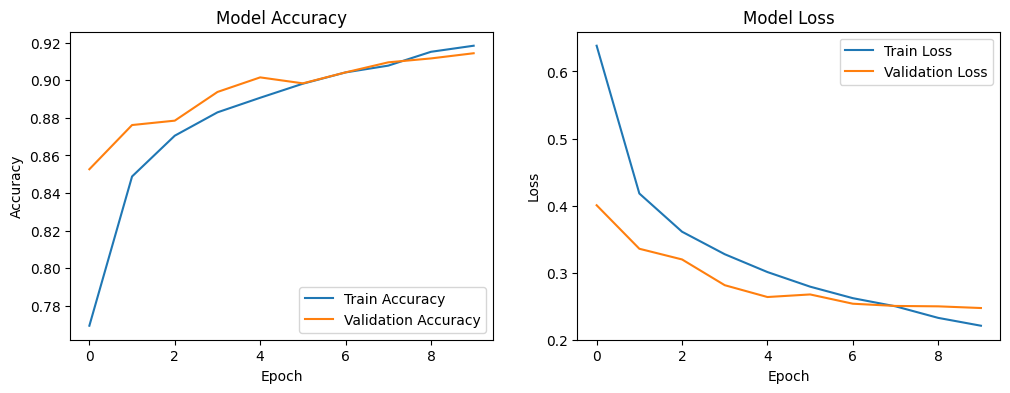

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

### Step 9: Visualize Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


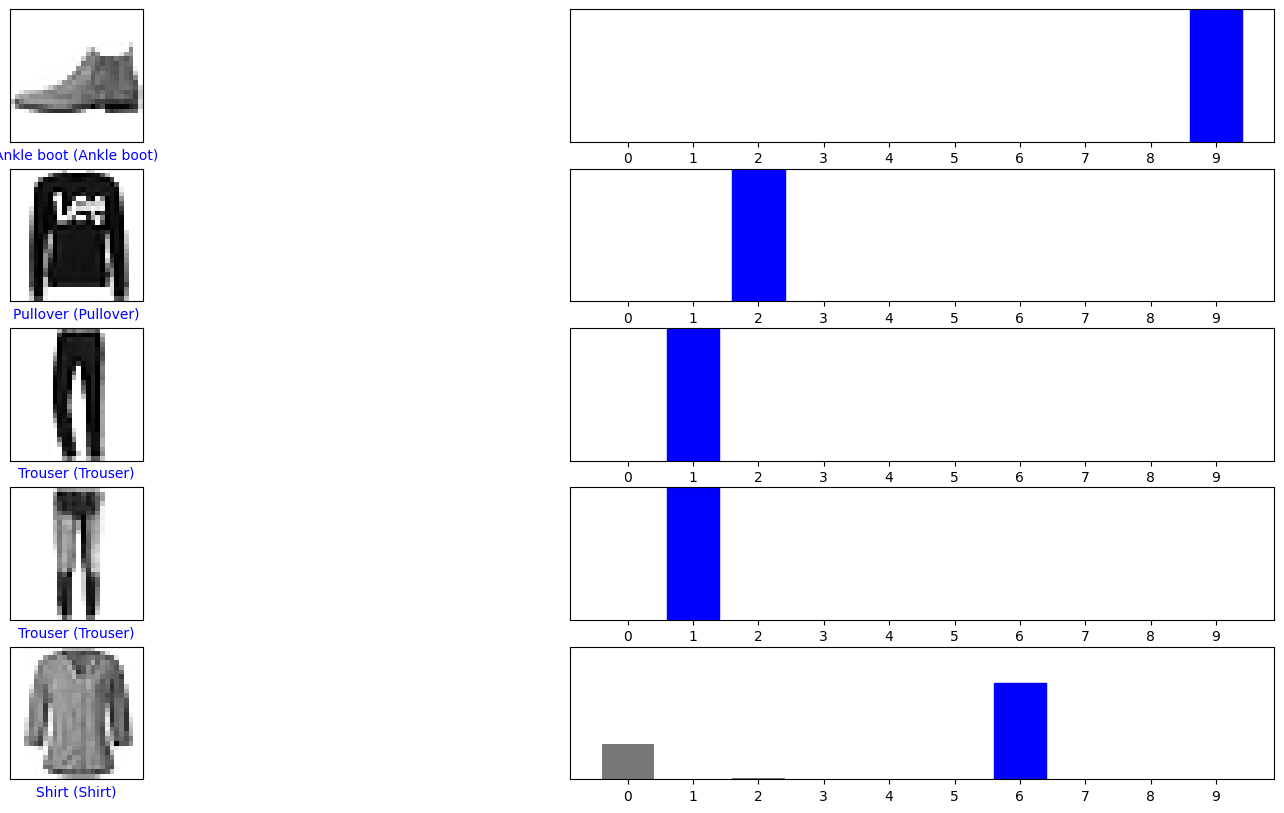

In [11]:
predictions = model.predict(test_images)

# Define a function to plot an image along with its predicted and true labels
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

# Define a function to plot the confidence of each class prediction
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first 5 test images, predicted labels, and true labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X = 5
plt.figure(figsize=(2*2*X, 2*X))
for i in range(X):
    plt.subplot(X, 2, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(X, 2, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

## Conclusion
In this project, we successfully implemented an image classification system using Convolutional Neural Networks (CNNs) to classify images from the Fashion MNIST dataset. The model effectively identified and categorized various types of clothing, showcasing the power and flexibility of CNNs in handling complex image data. This implementation demonstrates the potential of CNNs in applications such as fashion analysis, automated image tagging, and pattern recognition.

### Insights
- **Model Performance**: The CNN model achieved high accuracy on the test dataset, demonstrating its ability to learn and generalize from the image data, even with challenging tasks like distinguishing between visually similar clothing items.
- **Data Preprocessing**: The normalization techniques applied to the dataset were crucial in improving the model’s generalization, reducing overfitting, and enhancing overall performance.

### Recommendations
- **Model Improvement**: Exploring deeper architectures, additional regularization techniques, or advanced hyperparameter tuning could further enhance accuracy and robustness, potentially leading to even better performance.
- **Application Expansion**: Extending this model to different datasets or incorporating transfer learning with pre-trained models could enable broader applications, such as domain-specific fashion analysis or fine-grained classification tasks.

### Final Thoughts
This project illustrates the effectiveness of CNNs in image classification tasks, particularly in the fashion domain. The model’s success highlights the importance of proper data preprocessing and the significant potential of CNNs in various image-related applications. Future enhancements could further expand the model’s applicability and performance in real-world scenarios.

### Acknowledgements
- **Dataset Source**: Fashion MNIST dataset provided by Zalando.
- **Libraries**: Utilized TensorFlow and Keras for model development and training, and Matplotlib for data visualization.

### Contact Information
For further inquiries or collaborations, please contact muhammadbinsadiq6@gmail.com.

### About the Author
- **Name**: Muhammad Bin Sadiq
- **Email**: muhammadbinsadiq6@gmail.com
- **LinkedIn**: [Muhammad Bin Sadiq](https://www.linkedin.com/in/iammuhammadbinsadiq/)
- **Portfolio**: [https://iammuhammadbinsadiq.github.io/](https://iammuhammadbinsadiq.github.io/)